##  Assignment: Model Performance with and without PCA

In this assignment, you will train a machine learning model on a dataset and evaluate its performance before and after applying Principal Component Analysis (PCA).  

You will:  
- Train a classifier using original features  
- Apply PCA to reduce dimensionality  
- Retrain the classifier using PCA-transformed features  
- Compare accuracy and discuss the results  

## Use breast cancer dataset from scikit learn

In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

print("Shape of dataset:", X.shape)


Shape of dataset: (569, 30)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
clf_original = RandomForestClassifier(random_state=42)
clf_original.fit(X_train_scaled, y_train)
y_pred_original = clf_original.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred_original)

print(f"Accuracy without PCA: {accuracy_original:.4f}")


Accuracy without PCA: 0.9561


In [7]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Explained Variance Ratio (first 10 components): {pca.explained_variance_ratio_}")
print(f"Total Variance Explained by 10 components: {np.sum(pca.explained_variance_ratio_):.4f}")


Explained Variance Ratio (first 10 components): [0.44413492 0.18944618 0.09543356 0.06724689 0.0551769  0.03934534
 0.02181766 0.01583317 0.01278783 0.01145443]
Total Variance Explained by 10 components: 0.9527


In [8]:
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy with PCA: {accuracy_pca:.4f}")

Accuracy with PCA: 0.9211


In [9]:
print("======== Comparison ========")
print(f"Accuracy without PCA: {accuracy_original:.4f}")
print(f"Accuracy with PCA:    {accuracy_pca:.4f}")

======== Comparison ========
Accuracy without PCA: 0.9561
Accuracy with PCA:    0.9211


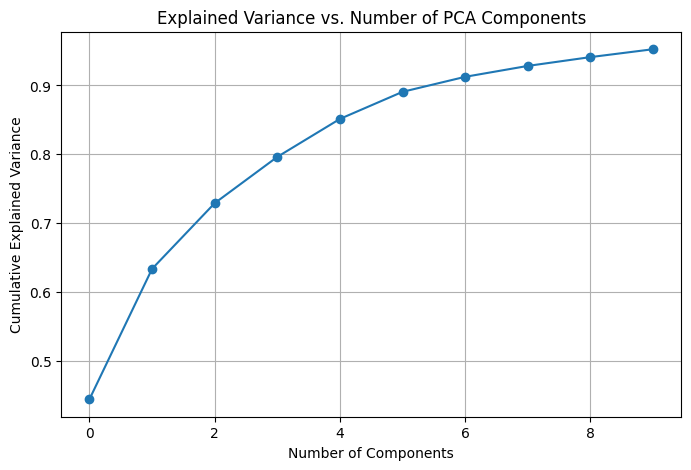

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of PCA Components')
plt.grid(True)
plt.show()